In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import models, layers
import os

In [2]:
pwd = os.getcwd()
pwd

'C:\\Users\\223102397\\Documents\\Deep Learning\\tomatoes-disease\\training'

In [3]:
BATCH_SIZE = 68
IMAGE_SIZE = 256
CHANNELS = 3


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('TomatoesImagesFull',shuffle=True, image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=68, seed = 123)

Found 16011 files belonging to 10 classes.


In [5]:
len(dataset)

236

In [6]:
class_names= dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
train_size = 0.8
len(dataset)*train_size

188.8

In [8]:
train_ds = dataset.take(188)

In [9]:
len(train_ds)

188

In [10]:
test_ds = dataset.skip(188)
len(test_ds)

48

In [11]:
val_size = 0.1
len(dataset)*val_size

23.6

In [12]:
val_ds = test_ds.take(23)
len(val_ds)

23

In [13]:
test_ds = test_ds.skip(23)
len(test_ds)

25

In [14]:
resize_and_rescale = keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(scale=1./255)
])

In [15]:
resize_and_rescale

In [16]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 10

In [17]:
model = tf.keras.models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [18]:
model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (68, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (68, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (68, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (68, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (68, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (68, 60, 60, 64)         

In [20]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])

In [21]:
history = model.fit(train_ds, validation_data=val_ds,epochs=15,batch_size=BATCH_SIZE, verbose=1)

Epoch 1/15
188/188 [==============================] - 545s 3s/step - loss: 1.5752 - accuracy: 0.4457 - val_loss: 1.1322 - val_accuracy: 0.5818
Epoch 2/15
188/188 [==============================] - 631s 3s/step - loss: 0.8513 - accuracy: 0.7125 - val_loss: 0.6827 - val_accuracy: 0.7583
Epoch 3/15
188/188 [==============================] - 693s 4s/step - loss: 0.5707 - accuracy: 0.8033 - val_loss: 0.4852 - val_accuracy: 0.8312
Epoch 4/15
188/188 [==============================] - 710s 4s/step - loss: 0.4193 - accuracy: 0.8561 - val_loss: 0.3949 - val_accuracy: 0.8581
Epoch 5/15
188/188 [==============================] - 740s 4s/step - loss: 0.3512 - accuracy: 0.8795 - val_loss: 0.3409 - val_accuracy: 0.8683
Epoch 6/15
188/188 [==============================] - 695s 4s/step - loss: 0.2789 - accuracy: 0.9021 - val_loss: 0.2566 - val_accuracy: 0.8983
Epoch 7/15
188/188 [==============================] - 692s 4s/step - loss: 0.2364 - accuracy: 0.9182 - val_loss: 0.2389 - val_accuracy: 0.9047

In [22]:
scores = model.evaluate(test_ds)
scores

25/25 [==============================] - 37s 983ms/step - loss: 0.2278 - accuracy: 0.9296


[0.2277889847755432, 0.9296452403068542]

In [23]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 188}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

In [26]:
EPOCHS = 15

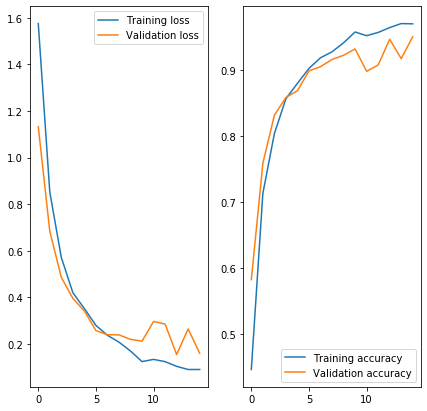

In [27]:
plt.figure(figsize=(7,7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), acc, label = 'Training accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation accuracy')
plt.legend()


### Try

In [28]:
for data in dataset.take(1):
    print(data)

(<tf.Tensor: shape=(68, 256, 256, 3), dtype=float32, numpy=
array([[[[132., 132., 132.],
         [129., 129., 129.],
         [128., 128., 128.],
         ...,
         [135., 139., 140.],
         [135., 139., 140.],
         [135., 139., 140.]],

        [[139., 139., 139.],
         [136., 136., 136.],
         [133., 133., 133.],
         ...,
         [135., 139., 140.],
         [134., 138., 139.],
         [134., 138., 139.]],

        [[143., 143., 143.],
         [139., 139., 139.],
         [136., 136., 136.],
         ...,
         [135., 139., 140.],
         [134., 138., 139.],
         [134., 138., 139.]],

        ...,

        [[ 60.,  59.,  64.],
         [ 63.,  62.,  67.],
         [ 65.,  64.,  69.],
         ...,
         [103., 103., 103.],
         [101., 101., 101.],
         [ 98.,  98.,  98.]],

        [[ 54.,  53.,  58.],
         [ 56.,  55.,  60.],
         [ 58.,  57.,  62.],
         ...,
         [110., 110., 110.],
         [113., 113., 113.],
       